# Canada Per Capita Income Prediction

This notebook demonstrates linear regression to predict Canada's per capita income for future years.

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
# Simple test to see if Python is working
print("Hello! Python is working!")
print("Testing basic math: 2 + 2 =", 2 + 2)

Hello! Python is working!
Testing basic math: 2 + 2 = 4


In [4]:
# Test cell - let's start fresh
# Load the correct CSV file
df_canada = pd.read_csv('canada_per_capita_income.csv')
print("\\nLoaded data shape:", df_canada.shape)
print("Columns:", df_canada.columns.tolist())
df_canada.head()

\nLoaded data shape: (47, 2)
Columns: ['year', 'per capita income (US$)']


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
import os
print("Current directory:", os.getcwd())
print("Files in current directory:", os.listdir('.'))

# Load the Canada per capita income data
df = pd.read_csv('canada_per_capita_income.csv')
print("Data loaded successfully!")
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
df.head()

Current directory: d:\Ashvad\AIML\PoCs\practice\ML\1_linear_reg\Exercise
Files in current directory: ['canada_per_capita_income.csv', 'canada_per_capita_income.ipynb', 'canada_per_capita_income_1.ipynb']
Data loaded successfully!
Columns: ['year', 'per capita income (US$)']
Shape: (47, 2)


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0.5, 1.0, 'Canada Per Capita Income Over Time')

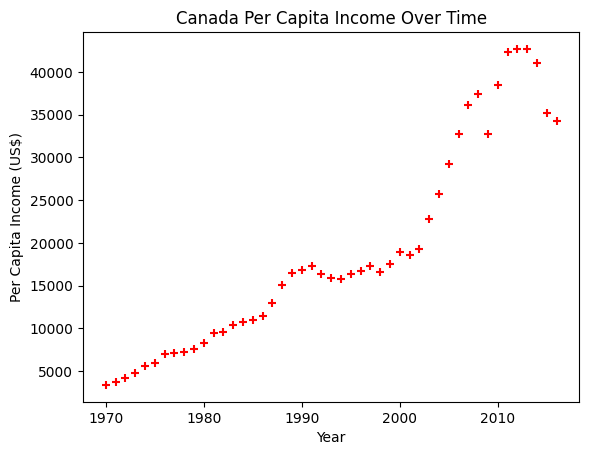

In [6]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.scatter(df['year'], df['per capita income (US$)'], color='red', marker='+')
plt.title('Canada Per Capita Income Over Time')

In [7]:
# Create feature matrix (X) with year data
new_df = df[['year']]
new_df

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [8]:
# Target variable (y) - per capita income
income = df['per capita income (US$)']
income

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

In [9]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df, income)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**(1) Predict Canada's per capita income for year 2020**

In [10]:
# Predict income for year 2020
predicted_2020 = reg.predict([[2020]])
print(f"Predicted per capita income for 2020: ${predicted_2020[0]:,.2f}")
predicted_2020

Predicted per capita income for 2020: $41,288.69


C:\Users\survi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [11]:
## y = mx + c
# m = slope = reg.coef_[0]
reg.coef_

array([828.46507522])

In [12]:
## y = mx + c
## c = intercept
reg.intercept_

np.float64(-1632210.7578554575)

**Y = m * X + b (m is coefficient and b is intercept)**

In [13]:
# Manual calculation: y = mx + b
# Where m is slope (coefficient) and b is intercept
slope = reg.coef_[0]
intercept = reg.intercept_
manual_prediction_2020 = slope * 2020 + intercept
print(f"Manual calculation: {slope:.2f} * 2020 + {intercept:.2f} = ${manual_prediction_2020:.2f}")
manual_prediction_2020

Manual calculation: 828.47 * 2020 + -1632210.76 = $41288.69


np.float64(41288.69409441762)

**(2) Let's also predict for a few other years to see the trend**

In [14]:
# Predict for multiple years
future_years = [[2017], [2018], [2019], [2020], [2021], [2025]]
predictions = reg.predict(future_years)

for i, year in enumerate([2017, 2018, 2019, 2020, 2021, 2025]):
    print(f"Predicted income for {year}: ${predictions[i]:,.2f}")
    
predictions

Predicted income for 2017: $38,803.30
Predicted income for 2018: $39,631.76
Predicted income for 2019: $40,460.23
Predicted income for 2020: $41,288.69
Predicted income for 2021: $42,117.16
Predicted income for 2025: $45,431.02


C:\Users\survi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 45431.01947053])

C:\Users\survi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\survi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\survi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


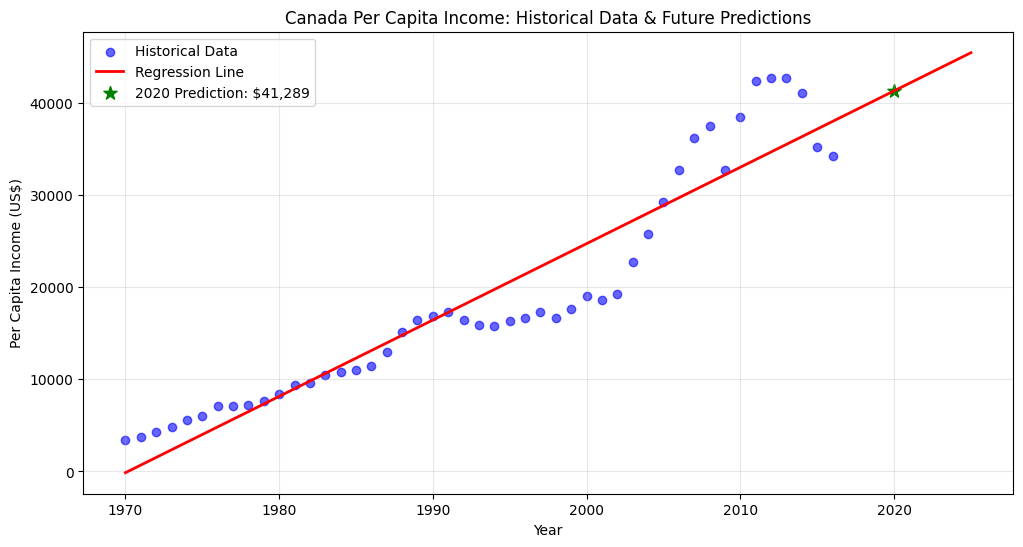

\nModel Coefficients:
Slope (per year): $828.47
Intercept: $-1,632,210.76
\nModel R² Score: 0.8909


In [15]:
# Visualize the regression line with prediction
plt.figure(figsize=(12, 6))

# Plot original data
plt.scatter(df['year'], df['per capita income (US$)'], color='blue', alpha=0.6, label='Historical Data')

# Create prediction line
years_extended = range(1970, 2026)
income_prediction_line = reg.predict([[year] for year in years_extended])
plt.plot(years_extended, income_prediction_line, color='red', linewidth=2, label='Regression Line')

# Highlight 2020 prediction
plt.scatter([2020], reg.predict([[2020]]), color='green', s=100, marker='*', 
           label=f'2020 Prediction: ${reg.predict([[2020]])[0]:,.0f}')

plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Canada Per Capita Income: Historical Data & Future Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print model performance metrics
print(f"\\nModel Coefficients:")
print(f"Slope (per year): ${reg.coef_[0]:,.2f}")
print(f"Intercept: ${reg.intercept_:,.2f}")
print(f"\\nModel R² Score: {reg.score(new_df, income):.4f}")